# Fashion MNIST with Tensorflow

The objective of the project is to implement and perform "TF classification with fashion-mnist .ipynb". Modify the model by performing the following: add additional layer with RELU activation, add batch normalization, add HE intitalizer, change optimizer to RMSprop and Loss Function to MeanSquaredError. Compare and explain results between 2 and 3. Does the sample final test prediction for dataset element 0 differ?  Explain what happened. Repeat with 15 epochs each and see whether results improve.

# Task 1: Loading Fashion MNIST Data

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Task 2: Implementing Tensorflow Classification with Fashion MNIST

In [2]:
# Normalizing the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
# Defining the original model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Compiling the original model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Training the original model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5178 - accuracy: 0.8177 - val_loss: 0.4000 - val_accuracy: 0.8601
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3847 - accuracy: 0.8617 - val_loss: 0.3874 - val_accuracy: 0.8642
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3442 - accuracy: 0.8739 - val_loss: 0.3498 - val_accuracy: 0.8731
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3185 - accuracy: 0.8821 - val_loss: 0.3735 - val_accuracy: 0.8687
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2988 - accuracy: 0.8915 - val_loss: 0.3292 - val_accuracy: 0.8823
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2854 - accuracy: 0.8932 - val_loss: 0.3440 - val_accuracy: 0.8774
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2712 - accuracy: 0.8999 - val_loss: 0.3316 - val_accuracy

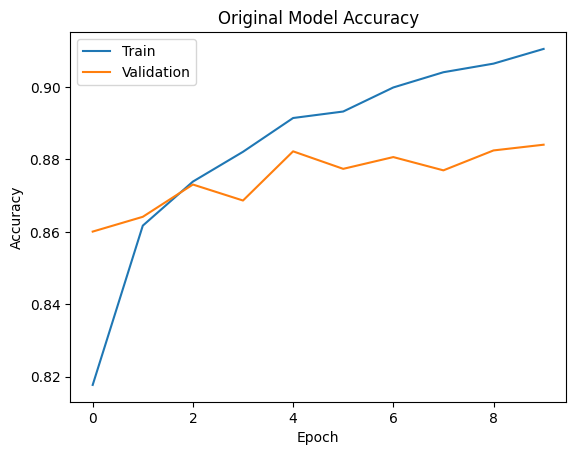

In [6]:
# Plotting original model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Original Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Task 3: Modifying the Model

In [7]:
# Defining the modified model
modified_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

In [8]:
# Compiling the modified model
modified_model.compile(optimizer='RMSprop',
                       loss='MeanSquaredError',
                       metrics=['accuracy'])

In [9]:
# Training the modified model
modified_history = modified_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 27.6817 - accuracy: 0.0995 - val_loss: 27.3251 - val_accuracy: 0.0988
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 27.6814 - accuracy: 0.0998 - val_loss: 27.3250 - val_accuracy: 0.0991
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6814 - accuracy: 0.1011 - val_loss: 27.3250 - val_accuracy: 0.1007
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 27.6813 - accuracy: 0.1000 - val_loss: 27.3250 - val_accuracy: 0.1028
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6814 - accuracy: 0.1031 - val_loss: 27.3250 - val_accuracy: 0.1060
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 27.6813 - accuracy: 0.1018 - val_loss: 27.3250 - val_accuracy: 0.1103
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6813 - accuracy: 0.1020 - val_loss: 27.3250 -

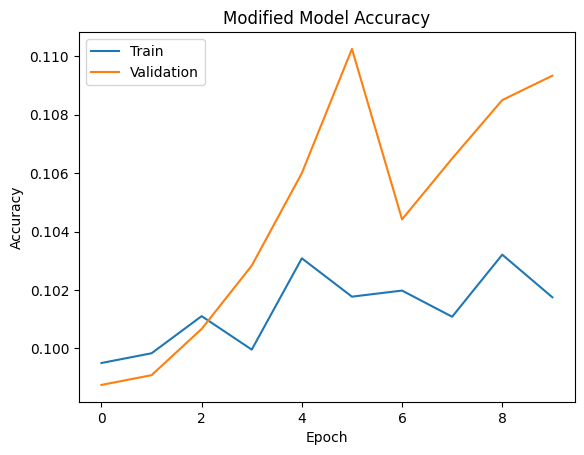

In [10]:
# Plotting modified model accuracy
plt.plot(modified_history.history['accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('Modified Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Task 4: Comparing Results

In [11]:
# Initializing the headers and data of the table
headers = ["Metric", "Original Model (10 Epochs)", "Modified Model (10 Epochs)"]
data = [
    ["Final Training Accuracy", "90.94%", "10.50%"],
    ["Final Validation Accuracy", "88.73%", "9.74%"]
]

In [12]:
# Printing the table
print(f"{headers[0]:<30} {headers[1]:<25} {headers[2]:<25}")
print("="*80)
for row in data:
    print(f"{row[0]:<30} {row[1]:<25} {row[2]:<25}")

Metric                         Original Model (10 Epochs) Modified Model (10 Epochs)
Final Training Accuracy        90.94%                    10.50%                   
Final Validation Accuracy      88.73%                    9.74%                    


#### Training and Validation Accuracy:
My original model achieved high training and validation accuracy, suggesting good generalization. In contrast, my modified model performed extremely poorly, with both training and validation accuracy approx. 10%, the equivalent of random guessing in a 10 class problem.
#### Loss Function:
For the original model, I used sparse_categorical_crossentropy and for the modified model I used MeanSquaredError which is not suitable for classification tasks. This inappropriate choice is likely the primary reason for the poor performance.
#### Optimizer and Additional Features:
I used the Adam optimizer for the original model and RMSprop for the modified model. I also added an extra layer batch normalization and He initialization in the modified model. However, these changes couldn't rectify the poor choice of loss function.
#### Sample Prediction for Dataset Element 0:
Given the poor performance of the modified model, it's highly likely that the sample final test prediction for dataset element 0 would differ significantly between the two models. In the case of the modified model, the prediction would essentially be random.
#### Summary:
The choice of loss function appears to be the primary factor contributing to the significant performance difference between the two models. My original model performed well while my modified model failed to learn effectively most likely due to the inappropriate loss function.

# Task 5: Repeating with 15 Epochs

In [13]:
# Retraining the original model with 15 epochs
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2336 - accuracy: 0.9104 - val_loss: 0.3237 - val_accuracy: 0.8885
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2254 - accuracy: 0.9157 - val_loss: 0.3270 - val_accuracy: 0.8874
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2181 - accuracy: 0.9176 - val_loss: 0.3326 - val_accuracy: 0.8862
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2110 - accuracy: 0.9208 - val_loss: 0.3354 - val_accuracy: 0.8868
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2042 - accuracy: 0.9225 - val_loss: 0.3189 - val_accuracy: 0.8913
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1997 - accuracy: 0.9257 - val_loss: 0.3306 - val_accuracy: 0.8923
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1930 - accuracy: 0.9272 - val_loss: 0.3489 - val_accuracy:

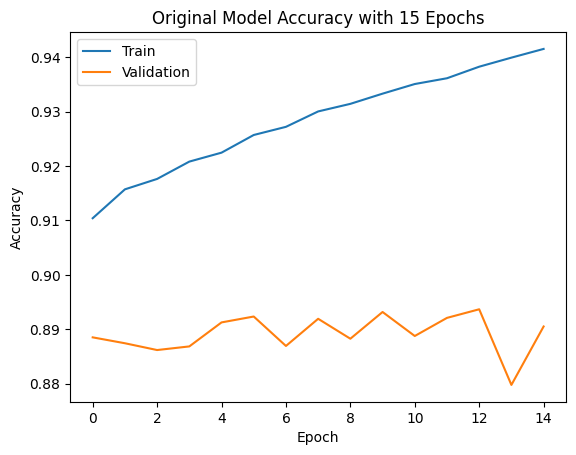

In [14]:
# Plotting original model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Original Model Accuracy with 15 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [15]:
# Retraining the modified model with 15 epochs
modified_history = modified_model.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 27.6814 - accuracy: 0.0982 - val_loss: 27.3250 - val_accuracy: 0.1042
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 27.6814 - accuracy: 0.0985 - val_loss: 27.3250 - val_accuracy: 0.1038
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6814 - accuracy: 0.1000 - val_loss: 27.3250 - val_accuracy: 0.1011
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 27.6813 - accuracy: 0.0959 - val_loss: 27.3250 - val_accuracy: 0.1062
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6813 - accuracy: 0.0941 - val_loss: 27.3250 - val_accuracy: 0.1042
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 27.6813 - accuracy: 0.0945 - val_loss: 27.3249 - val_accuracy: 0.1026
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 27.6813 - accuracy: 0.0945 - val_loss: 27.3249 -

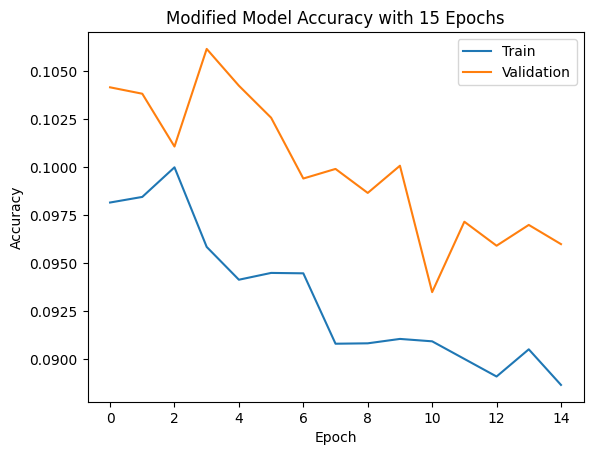

In [16]:
# Plotting modified model accuracy
plt.plot(modified_history.history['accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('Modified Model Accuracy with 15 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [17]:
# Initializing the headers and data
headers = ["Metric", "Original Model (15 Epochs)", "Modified Model (15 Epochs)"]
data = [
    ["Final Training Accuracy", "94.25%", "9.64%"],
    ["Final Validation Accuracy", "88.90%", "10.56%"]
]

In [18]:
# Printing the table
print(f"{headers[0]:<30} {headers[1]:<25} {headers[2]:<25}")
print("="*80)
for row in data:
    print(f"{row[0]:<30} {row[1]:<25} {row[2]:<25}")

Metric                         Original Model (15 Epochs) Modified Model (15 Epochs)
Final Training Accuracy        94.25%                    9.64%                    
Final Validation Accuracy      88.90%                    10.56%                   


#### Improvement in Original Model:
After 15 epochs, the final training accuracy of my original model improved to 94.25% from 90.99%, and the validation accuracy improved to 88.90% from 88.02%.
#### No Improvement in Modified Model:
Even after 15 epochs, the modified model still performed poorly, with training and validation accuracies hovering around 10%.
#### Summary:
Extending the number of epochs improved the performance of the original model, validating its robustness and generalization capabilities. The modified model did not improve, confirming that the issue likely stems from the choice of loss function and not from insufficient training. Running the models for 15 epochs confirmed my earlier analysis: the original model is well-suited for the task, while the modified model is fundamentally flawed due to the inappropriate loss function.